In [14]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

Comparison of different models:

In [100]:
def make_df(model_names, col1, nr_epochs=None):
    results = pd.DataFrame(columns=[col1, 'Phase', 'Accuracy', 'Epoch'])
    long = {'id': 'Identity', 'ge': 'Gender', 'et': 'Ethnicity'}
    for name in model_names:
        [train_res, val_res] = joblib.load(f"{name}.joblib")
        name_split = name.split('_')
        col1_dict = {'Recognizing': long[name_split[2]], 'Batch size': name_split[6], 'Model': name_split[1]}
        if nr_epochs: rnge = nr_epochs
        else: rnge=len(train_res)
        for i in range(rnge):
            results = results.append({col1: col1_dict[col1], 'Phase': 'train', 'Accuracy': train_res[i],
                                      'Epoch': i}, ignore_index=True)
            results = results.append({col1: col1_dict[col1], 'Phase': 'val', 'Accuracy': val_res[i],
                                      'Epoch': i}, ignore_index=True)
    return results

In [101]:
names_id = ['hist_resnet18_id_e_20_b_20', 'hist_resnet34_id_e_20_b_20', 'hist_densenet121_id_e_20_b_8',
            'hist_densenet169_id_e_20_b_6']
results = make_df(names_id, 'Model')

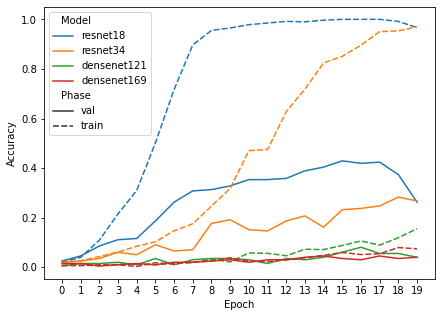

In [102]:
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()))
plt.show()

Densenet comparison:

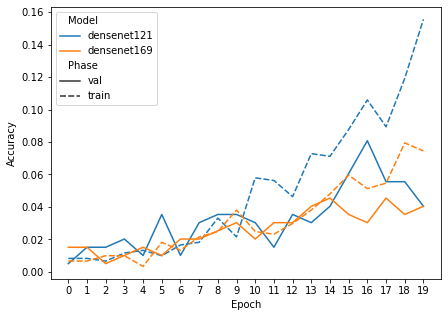

In [103]:
# lower learning rate -> worse
names_id = ['hist_densenet121_id_e_20_b_8',
            'hist_densenet169_id_e_20_b_6']
results = make_df(names_id, 'Model')

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()))
plt.show()

We can see that both densenet models perform much worse, so we will continue only with resnet architectures.

Accuracy of *resnet18* on different recognition problems:

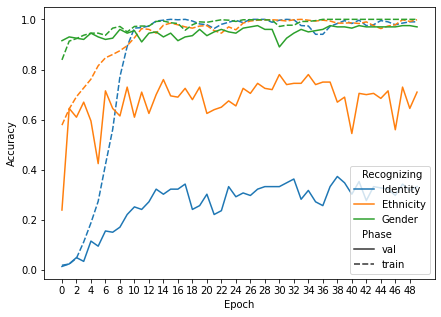

In [111]:
model_names = ['hist_resnet18_id_e_50_b_20', 'hist_resnet18_et_e_50_b_20', 'hist_resnet18_ge_e_50_b_20']
results = make_df(model_names, 'Recognizing')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Recognizing', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Accuracy of *resnet34* on different recognition problems:

In [112]:
model_names = ['hist_resnet34_id_e_20_b_20', 'hist_resnet34_et_e_20_b_20', 'hist_resnet34_ge_e_20_b_20']
results = make_df(model_names, 'Recognizing')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Recognizing', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()))
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'hist_resnet34_et_e_20_b_20.joblib'

Accuracy of *resnet18* on identity problem with different batch sizes:

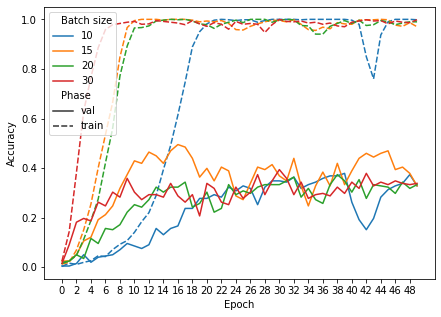

In [106]:
model_names = ['hist_resnet18_id_e_50_b_10', 'hist_resnet18_id_e_50_b_15', 'hist_resnet18_id_e_50_b_20', 'hist_resnet18_id_e_50_b_30']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Accuracy of *resnet34* on identity problem with different batch sizes:

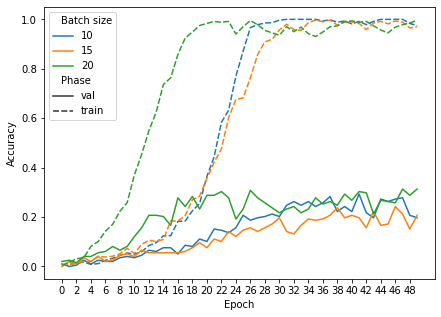

In [107]:
model_names = ['hist_resnet34_id_e_50_b_10', 'hist_resnet34_id_e_50_b_15', 'hist_resnet34_id_e_50_b_20']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Different learning rates, resnet18, identity problem

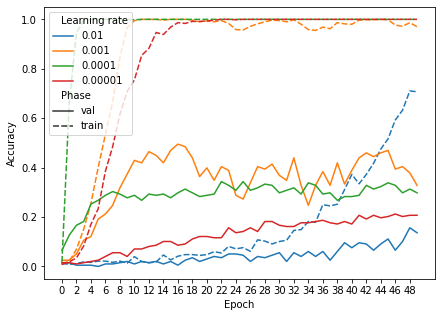

In [108]:
model_names = ['hist_resnet18_id_e_50_b_15_l01', 'hist_resnet18_id_e_50_b_15', 'hist_resnet18_id_e_50_b_15_l4',
               'hist_resnet18_id_e_50_b_15_l5']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(4):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.0{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.0{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


Different learning rates, resnet34, ethnicity problem

In [113]:
model_names = ['hist_resnet34_et_e_50_b_20', 'hist_resnet34_et_e_50_b_20_l4', 'hist_resnet34_et_e_50_b_20_l5']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(3):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'hist_resnet34_et_e_50_b_20.joblib'

Comparison of resnet18 and resnet34 with learning rate 0.0001 on identity problem.

In [ ]:
model_names = ['hist_resnet18_id_e_50_b_15_l4', 'hist_resnet34_id_e_50_b_20_l4']
results = make_df(model_names, 'Model')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Accuracy of resnet18 on ethnicity problem with different batch sizes:

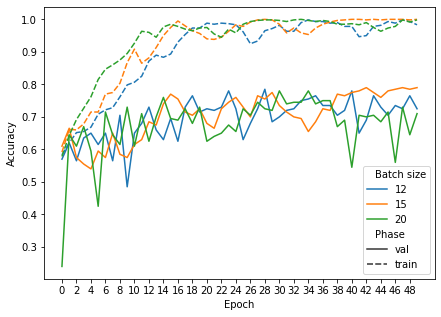

In [115]:
model_names = ['hist_resnet18_et_e_50_b_12', 'hist_resnet18_et_e_50_b_15', 'hist_resnet18_et_e_50_b_20']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()[::2]))
plt.show()


We can see that *resnet18* performs the best at our problem.

Accuracy of resnet18 with batch size 15 and learning rate 0.001 on all problems:

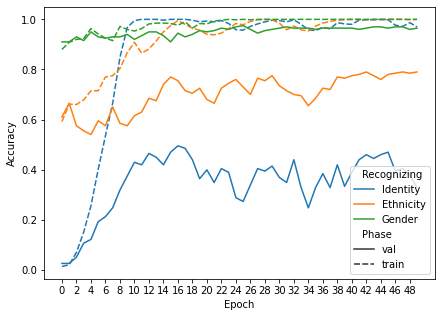

In [114]:
model_names = ['hist_resnet18_id_e_50_b_15', 'hist_resnet18_et_e_50_b_15', 'hist_resnet18_ge_e_50_b_15']
results = make_df(model_names, 'Recognizing')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Recognizing', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()[::2]))
plt.show()